# Cleaning Astronomical Datasets

I have posed two problems for you to work on in this hands-on exercise.  

- Concept drift: Do the training and test set distributions differ?
- Find mislabeled examples in the labeled ZTF data provided

More information for each is provided below.  You may want or need to cut and paste code from your other notebooks.  But first...


### 0a. Imports

These are all the imports that will be used in this notebook.  All should be available in the DSFP conda environment.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# You can add anything you need as you work

### 0b. Data Location

We will use the same data from the Day 2 clustering exercise (see [that notebook](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/master/Session7/Day2/Clustering-Astronomical-Sources.ipynb) to download the data).

Please specify paths for the following:

In [3]:
F_META = '../Day2/dsfp_ztf_meta.npy'
F_FEATS = '../Day2/dsfp_ztf_feats.npy'
D_STAMPS = '../Day2/dsfp_ztf_png_stamps'

### 0c. Load Data

In [4]:
meta_np = np.load(F_META)
feats_np = np.load(F_FEATS)

COL_NAMES = ['diffmaglim', 'magpsf', 'sigmapsf', 'chipsf', 'magap', 'sigmagap',
             'distnr', 'magnr', 'sigmagnr', 'chinr', 'sharpnr', 'sky',
             'magdiff', 'fwhm', 'classtar', 'mindtoedge', 'magfromlim', 'seeratio',
             'aimage', 'bimage', 'aimagerat', 'bimagerat', 'elong', 'nneg',
             'nbad', 'ssdistnr', 'ssmagnr', 'sumrat', 'magapbig', 'sigmagapbig',
             'ndethist', 'ncovhist', 'jdstarthist', 'jdendhist', 'scorr', 'label']

# NOTE FROM Umaa: I've decided to eliminate the following features. Dropping them.
#
COL_TO_DROP = ['ndethist', 'ncovhist', 'jdstarthist', 'jdendhist', 
               'distnr', 'magnr', 'sigmagnr', 'chinr', 'sharpnr', 
               'classtar', 'ssdistnr', 'ssmagnr', 'aimagerat', 'bimagerat', 
               'magapbig', 'sigmagapbig', 'scorr']
feats_df = pd.DataFrame(data=feats_np, index=meta_np['candid'], columns=COL_NAMES)
print("There are {} columns left.".format(len(feats_df.columns)))
print("They are: {}".format(list(feats_df.columns)))
feats_df.drop(columns=COL_TO_DROP, inplace=True) 
#feats_df.describe()

There are 36 columns left.
They are: ['diffmaglim', 'magpsf', 'sigmapsf', 'chipsf', 'magap', 'sigmagap', 'distnr', 'magnr', 'sigmagnr', 'chinr', 'sharpnr', 'sky', 'magdiff', 'fwhm', 'classtar', 'mindtoedge', 'magfromlim', 'seeratio', 'aimage', 'bimage', 'aimagerat', 'bimagerat', 'elong', 'nneg', 'nbad', 'ssdistnr', 'ssmagnr', 'sumrat', 'magapbig', 'sigmagapbig', 'ndethist', 'ncovhist', 'jdstarthist', 'jdendhist', 'scorr', 'label']


## 1. Concept Drift

In the last exercise, you created a training and test set for the purposes of building a classifier.  The goal of this exercise is to note any changes in the feature distributions for these two sets.

Per feature, can you:

- plot test vs. train distributions for both real and bogus, and note areas that does not overlap
- quantiatively measure this using [Kullback-Leibler divergence](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html), and print or plot the scores for all features.

Which feature exhibits the most drift between train and test?

In [5]:
# Lets first separate in train and test
nids = meta_np['nid']

train_real = feats_df[nids <= 550].query('label == 1')
test_real = feats_df[nids > 550].query('label == 1')

train_bogus = feats_df[nids <= 550].query('label == 0')
test_bogus = feats_df[nids > 550].query('label == 0')

In [6]:
list(test_bogus)

['diffmaglim',
 'magpsf',
 'sigmapsf',
 'chipsf',
 'magap',
 'sigmagap',
 'sky',
 'magdiff',
 'fwhm',
 'mindtoedge',
 'magfromlim',
 'seeratio',
 'aimage',
 'bimage',
 'elong',
 'nneg',
 'nbad',
 'sumrat',
 'label']

In [7]:
def KL_div(d1, d2, n = 10):
    
    x_min = np.min([d1.min(), d2.min()])
    x_max = np.max([d1.max(), d2.max()])
    new_bins = np.linspace(x_min, x_max, n)


    n1, bins1 = np.histogram(d1, bins = new_bins, density = True)
    n2, bins2 = np.histogram(d2, bins = new_bins, density = True)
    
    return entropy(n1, n2)

comparison for diffmaglim
KL real = 0.11674541200894183

KL bogus = inf



/home/daniela/anaconda3/envs/DSFP/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


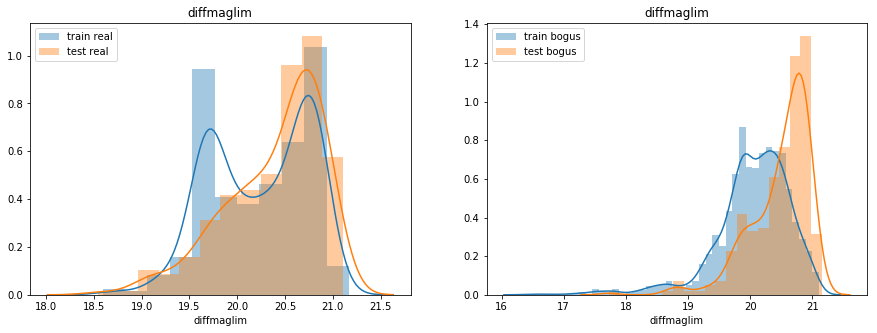

comparison for magpsf
KL real = inf

KL bogus = inf



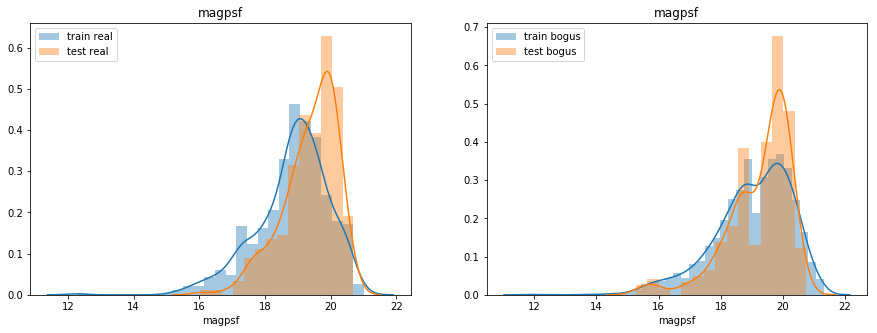

comparison for sigmapsf
KL real = inf

KL bogus = inf



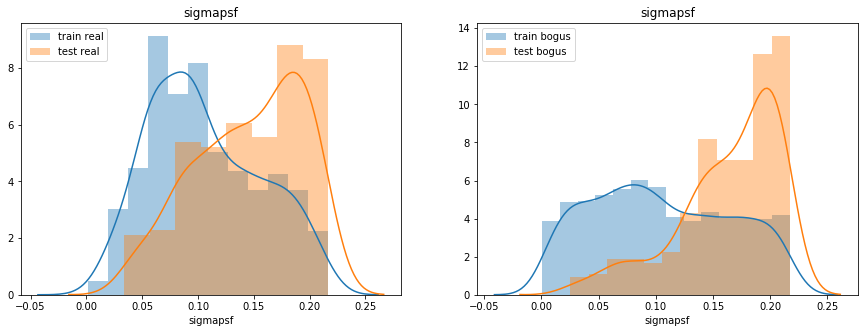

comparison for chipsf
KL real = inf

KL bogus = inf



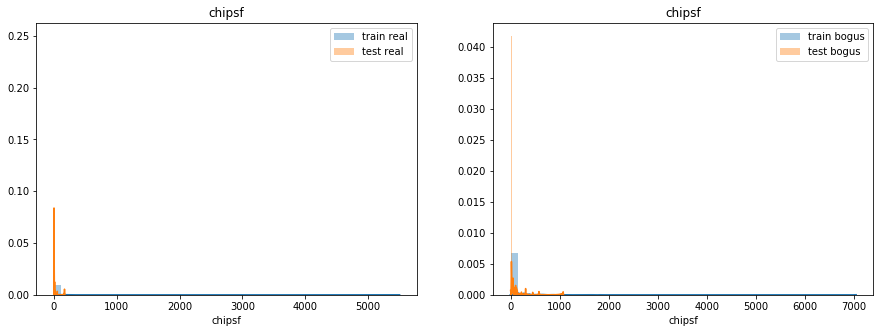

comparison for magap
KL real = inf

KL bogus = inf



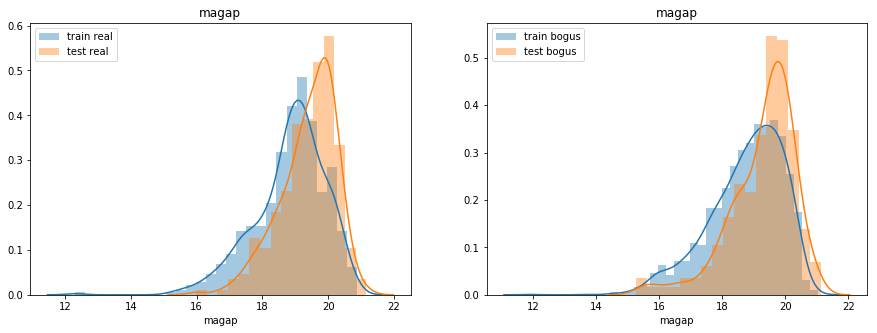

comparison for sigmagap
KL real = 0.2065460928287302

KL bogus = 0.2716681905574308



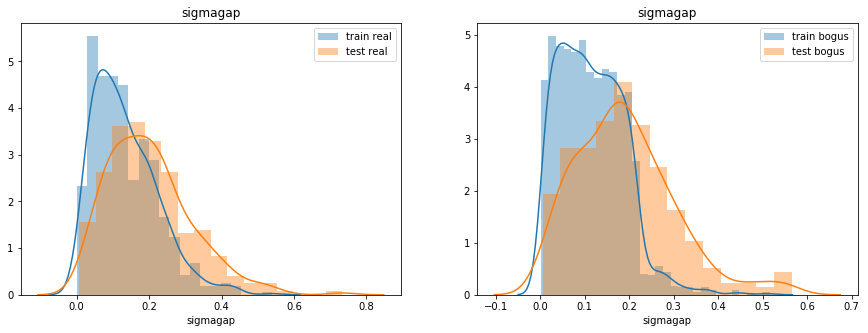

comparison for sky
KL real = inf

KL bogus = inf



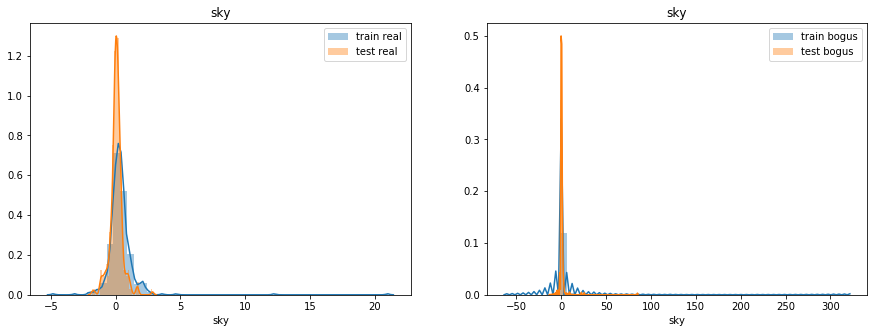

comparison for magdiff
KL real = inf

KL bogus = inf



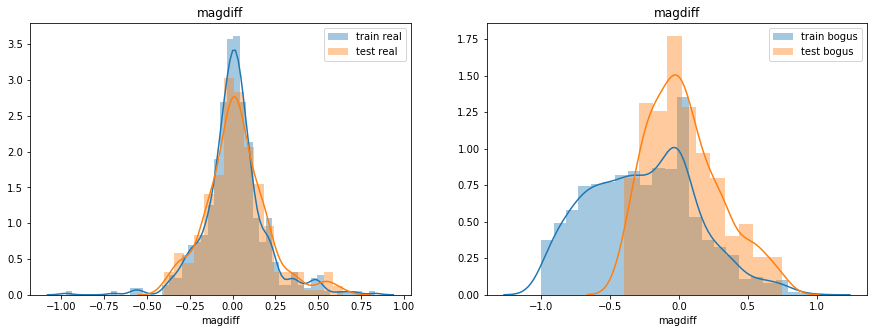

comparison for fwhm
KL real = inf

KL bogus = inf



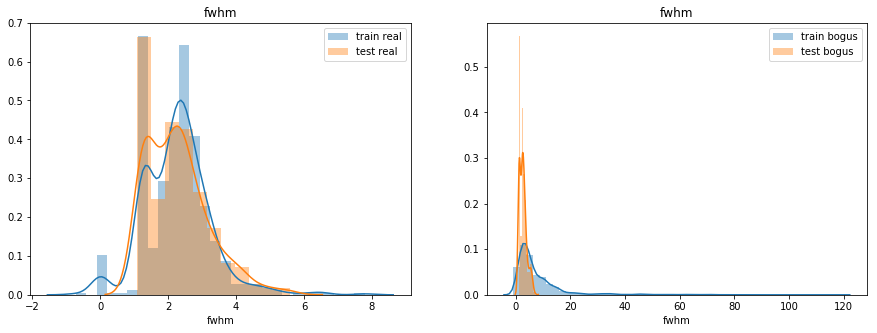

comparison for mindtoedge
KL real = 0.02913262303770158

KL bogus = 0.01421313180768886



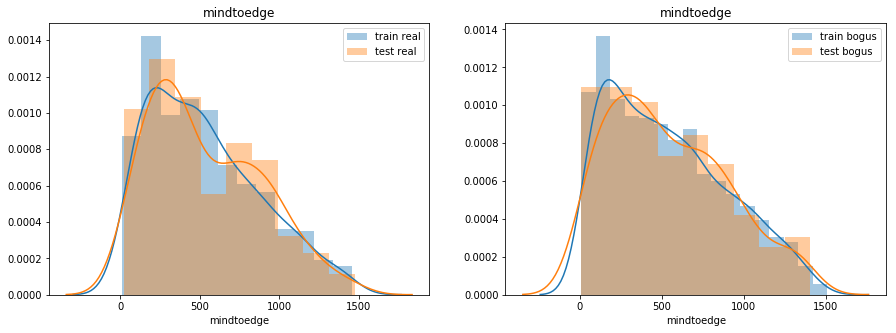

comparison for magfromlim
KL real = inf

KL bogus = inf



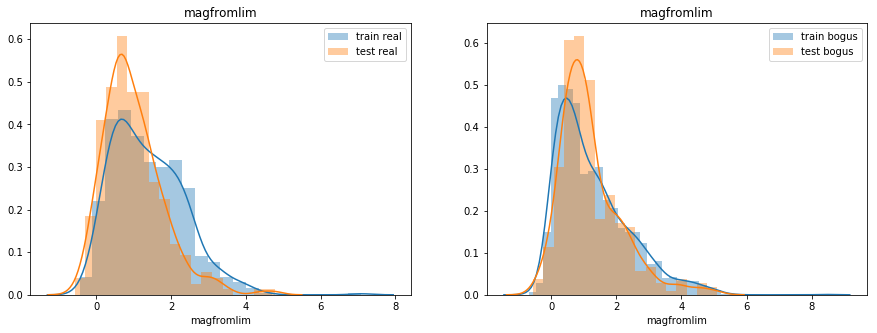

comparison for seeratio
KL real = inf

KL bogus = inf



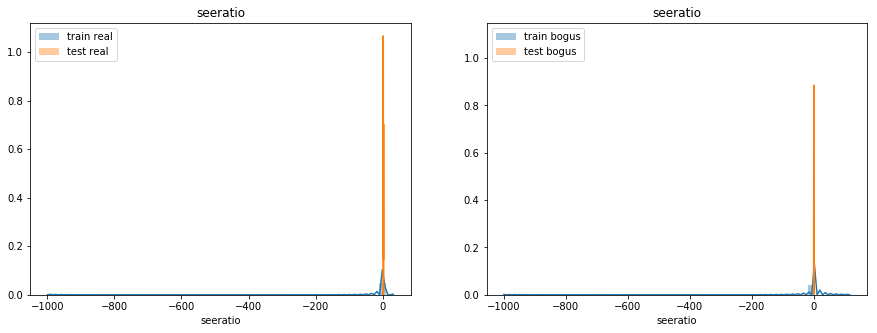

comparison for aimage
KL real = inf

KL bogus = inf



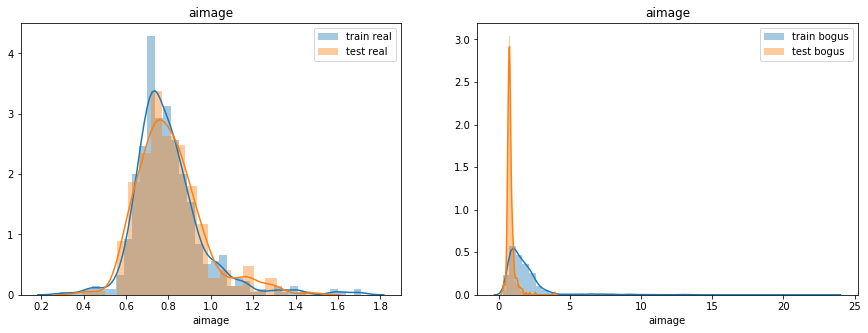

comparison for bimage
KL real = inf

KL bogus = inf



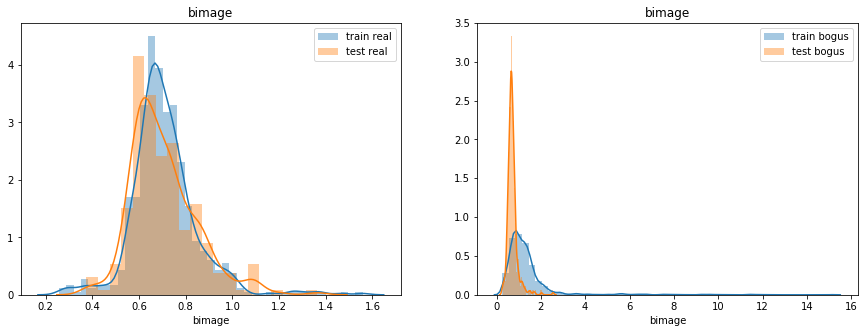

comparison for elong
KL real = inf

KL bogus = inf



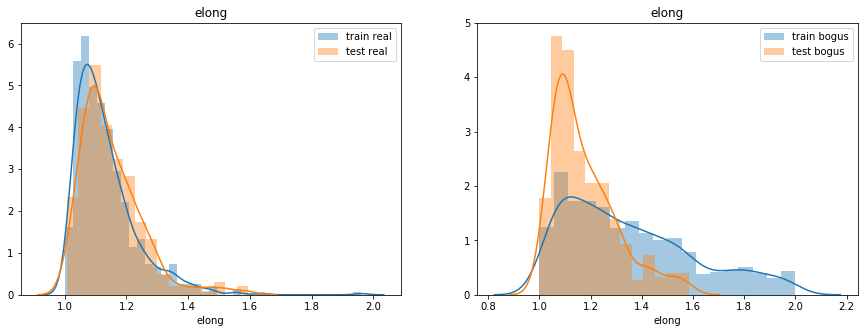

comparison for nneg
KL real = inf

KL bogus = 0.2206893109645529



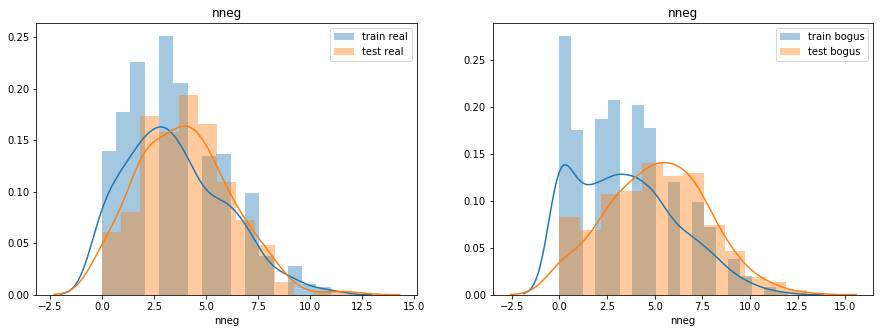

/home/daniela/anaconda3/envs/DSFP/lib/python3.6/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/daniela/anaconda3/envs/DSFP/lib/python3.6/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/daniela/anaconda3/envs/DSFP/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/daniela/anaconda3/envs/DSFP/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/daniela/anaconda3/envs/DSFP/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


comparison for nbad
KL real = nan

KL bogus = inf



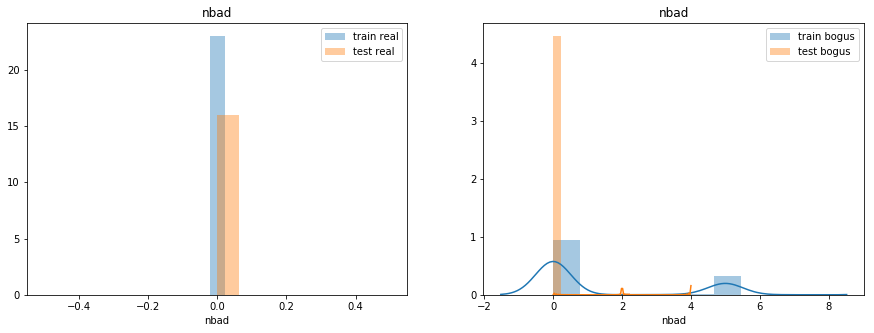

comparison for sumrat
KL real = inf

KL bogus = 0.04950289473340404



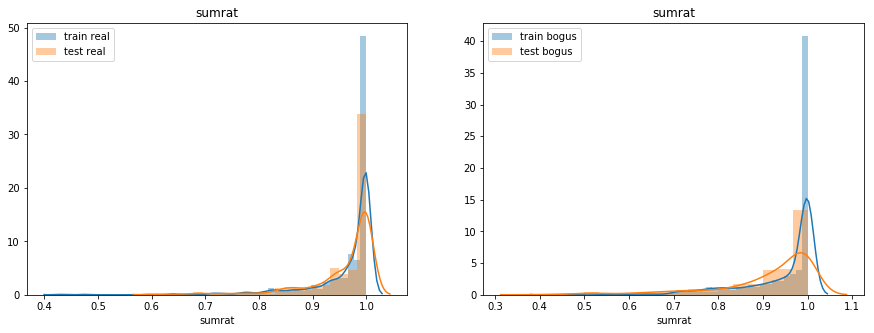

In [8]:
from scipy.stats import entropy

for i in range(len(list(feats_df)) - 1):
    
    kl_real = KL_div(train_real[list(feats_df)[i]], test_real[list(feats_df)[i]])
    kl_bogus = KL_div(train_bogus[list(feats_df)[i]], test_bogus[list(feats_df)[i]])
    
    print('comparison for {}'.format(list(feats_df)[i]))
    print('KL real = {}\n'.format(kl_real))
    print('KL bogus = {}\n'.format(kl_bogus))
    
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.distplot(train_real[list(feats_df)[i]], label = 'train real')
    sns.distplot(test_real[list(feats_df)[i]], label = 'test real')
    plt.title(list(feats_df)[i])
    plt.legend()
    
    plt.subplot(122)
    sns.distplot(train_bogus[list(feats_df)[i]], label = 'train bogus')
    sns.distplot(test_bogus[list(feats_df)[i]], label = 'test bogus')
    plt.title(list(feats_df)[i])
    plt.legend()
    plt.show()

## 2. Finding Mislabeled Examples

This task ties together the work you did for the unsupervised and supervised exercises.  Here's how to get started.

1. Cluster the entire labeled set provided to you.  How you choose to do the clustering is up to you.  I would recommend getting your clustering results into a two dimensional space that you can plot, but this is not strictly necessary.

2. Apply the labels to the clusters you've created and plot them.  If you're working in a >=3-dimensional space, find a way to print the candids in each cluster.  You can sort the list by examples that are closet to the centroids, and print their associated labels.

3. Look at some postage stamps of examples you suspect are mislabeled.  Can you devise a simple way to identify a set of mislabeled examples?  Can you come up with an estimate of how many examples are mislabeled?